In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("D:/Users/DELL/Downloads/wine+quality/winequality-red.csv",sep=';',quotechar='"')

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
# 6 统计数据集中是否有空缺
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
def plot_feature(name=None):
    plt.figure(figsize=(12,8))
    sns.displot(df[name])
    plt.show()

In [8]:
plot_feature(name='fixed acidity')

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

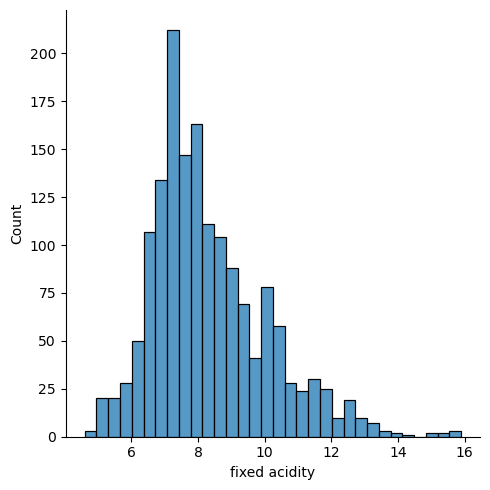

In [9]:
plot_feature(name='fixed acidity')

<Figure size 1200x800 with 0 Axes>

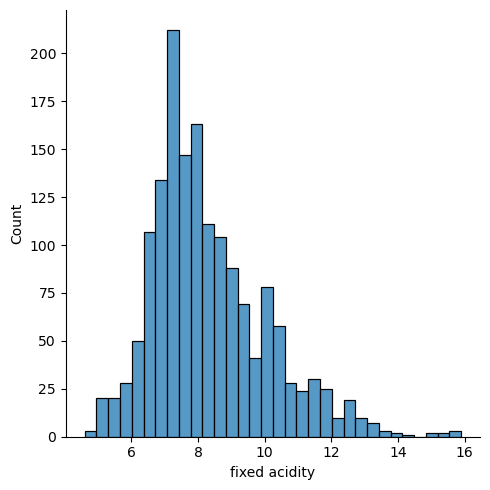

In [10]:
plot_feature(name='fixed acidity')

<Figure size 1200x800 with 0 Axes>

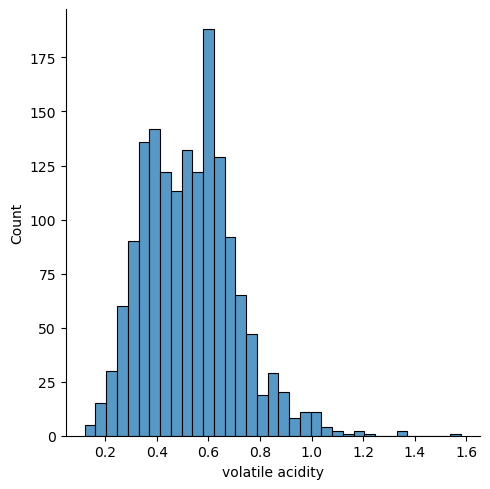

In [11]:
plot_feature(name='volatile acidity')

In [12]:
X = df.drop('quality', axis=1)
y = df['quality']

In [13]:
# 初始化权重和偏置
weights = np.zeros(X.shape[1])
bias = 0

# 定义梯度下降函数
def gradient_descent(X, y, weights, bias, learning_rate, epochs):
    m = len(y)
    eps = 1e-8  # 添加一个小常数以提高数值稳定性
    for epoch in range(epochs):
        y_pred = np.dot(X, weights) + bias
        # 添加小常数到分母以避免除零问题
        dw = (1/(m + eps)) * np.dot(X.T, (y_pred - y))
        db = (1/(m + eps)) * np.sum(y_pred - y)
        
        # 梯度截断（可选），限制梯度的大小
        max_gradient = 1.0  # 一个示例阈值
        dw = np.clip(dw, -max_gradient, max_gradient)
        db = np.clip(db, -max_gradient, max_gradient)
        
        # 更新权重和偏置
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # 可以在此处添加额外的逻辑来检查梯度是否有效，但通常不需要，除非你想在遇到NaN时立即停止循环
    return weights, bias

In [14]:
# 创建并训练模型
lr_sklearn = LinearRegression()
lr_sklearn.fit(X.values, y.values)

LinearRegression()

In [15]:
# 手动实现预测
y_pred_manual = np.dot(X.values, weights) + bias

# scikit-learn预测
y_pred_sklearn = lr_sklearn.predict(X.values)

# 检查y_pred_manual是否有NaN
if np.isnan(y_pred_manual).any():
     print("y.values contains NaN values.")
     # 你可以选择移除含有NaN值的对应行，或者用某种方法填充这些值，例如使用平均值、中位数或前一个/后一个值等
     # 以下是一个简单的例子，用0填充NaN，但根据实际情况选择最合适的处理方式
     y_pred_manual = np.nan_to_num(y.values)

 # # 同样的检查应用于y_pred_sklearn
 # if np.isnan(y_pred_sklearn).any():
 #     print("y_pred_sklearn contains NaN values.")
 #     y_pred_sklearn = np.nan_to_num(y_pred_sklearn)

# 同样检查y，尽管通常原始目标变量不应该有NaN，但出于完整性也进行检查
if np.isnan(y).any():
    print("y contains NaN values.")
    # 根据情况处理y中的NaN

# 现在再次尝试计算MSE
mse_manual = mean_squared_error(y,y_pred_manual )
mse_sklearn = mean_squared_error(y,y_pred_sklearn)

print(f"手动实现的MSE: {mse_manual}")
print(f"scikit-learn的MSE: {mse_sklearn}")

手动实现的MSE: 32.41651031894934
scikit-learn的MSE: 0.41676716722140805


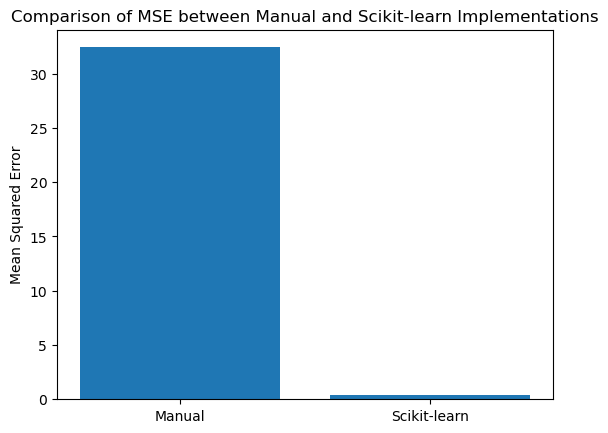

In [16]:
plt.bar(['Manual', 'Scikit-learn'], [mse_manual, mse_sklearn])
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE between Manual and Scikit-learn Implementations')
plt.show()

In [17]:
plt.scatter(y.values, y_pred_sklearn, color='blue', label='SKLearn Predictions')
plt.scatter(y.values, y_pred_manual, color='red', label='Manual Predictions')
plt.plot([min(y.values), max(y.values)], [min(y.values), max(y.values)], color='black', label='Ideal Line')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()


In [18]:
print(df.describe())  # 显示数值型特征的mean, std, min, 25%, 50%, 75%, max  
print(df.mode())      # 显示分类特征的众数


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

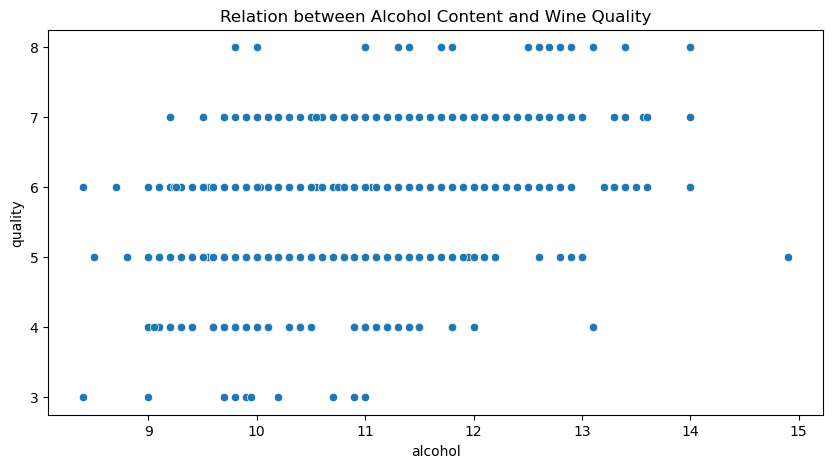

In [19]:
plt.figure(figsize=(10, 5))  
sns.scatterplot(x='alcohol', y='quality', data=df)  
plt.title('Relation between Alcohol Content and Wine Quality')  
plt.show()  

In [20]:
# 标准化数值型数据  
from sklearn.preprocessing import StandardScaler  
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns  
scaler = StandardScaler()  
df_scaled = df.copy()  
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])  

In [21]:
# 分析和记录数据处理前后的变化  
print("Original DataFrame:")  
print(df.head())  
print("\nScaled DataFrame:")  
print(df_scaled.head())

Original DataFrame:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
